# Load and inspect data

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv("C:/Users/user/Downloads/mcdonalds.csv")
# Initial inspection to understand if segmentation is needed
print("Initial data overview:\n", data.head())

Initial data overview:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [2]:
print("Data summary:\n", data.describe())

Data summary:
                Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [3]:
print("Data info:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
Data info:
 None


# Step 2: Choose Relevant Features for Segmentation

In [4]:
# Step 2: Choose Relevant Features for Segmentation
print("Columns in dataset:\n", data.columns)
selected_features = data[['Age', 'VisitFrequency', 'Gender', 'yummy', 'convenient', 'spicy', 'fast', 'tasty']]
print("Selected features for segmentation:\n", selected_features.head())


Columns in dataset:
 Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Selected features for segmentation:
    Age      VisitFrequency  Gender yummy convenient spicy fast tasty
0   61  Every three months  Female    No        Yes    No  Yes    No
1   51  Every three months  Female   Yes        Yes    No  Yes   Yes
2   62  Every three months  Female    No        Yes   Yes  Yes   Yes
3   69         Once a week  Female   Yes        Yes    No  Yes   Yes
4   49        Once a month    Male    No        Yes    No  Yes    No


# Step 3: Data Pre-processing

In [5]:
# Step 3: Data Pre-processing
from sklearn.preprocessing import StandardScaler

# Handle missing values
data = data.dropna()  # Drop rows with missing values for simplicity

# Encode categorical data if necessary (e.g., gender, region)
data = pd.get_dummies(data, drop_first=True)

# Standardize data for consistent scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Exploring Data

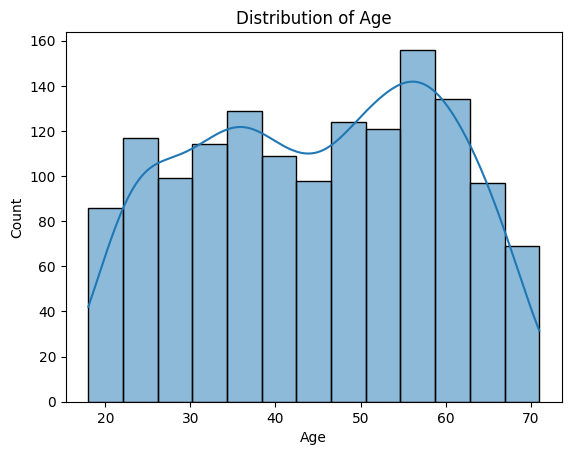

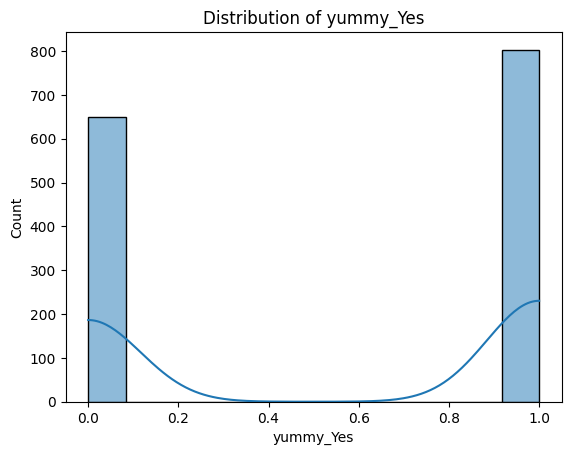

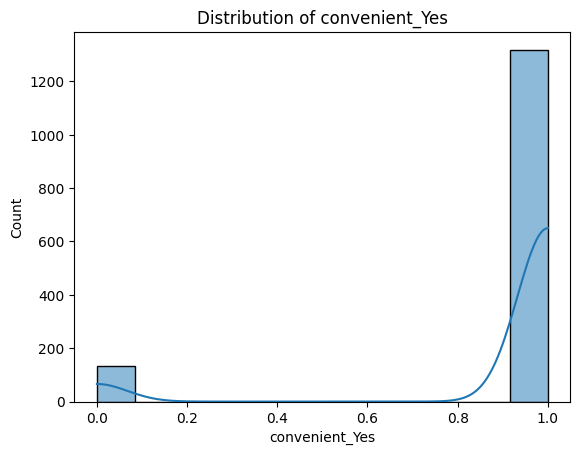

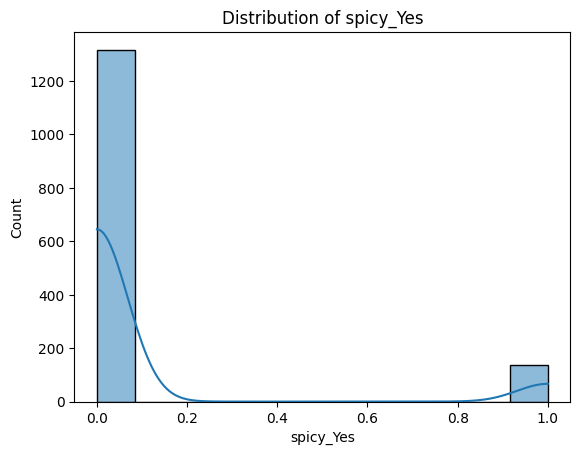

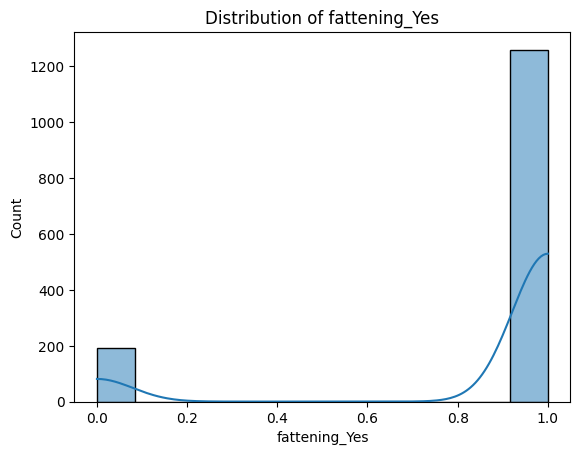

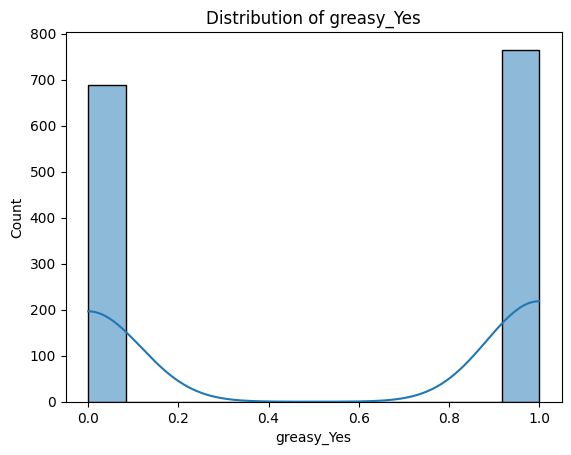

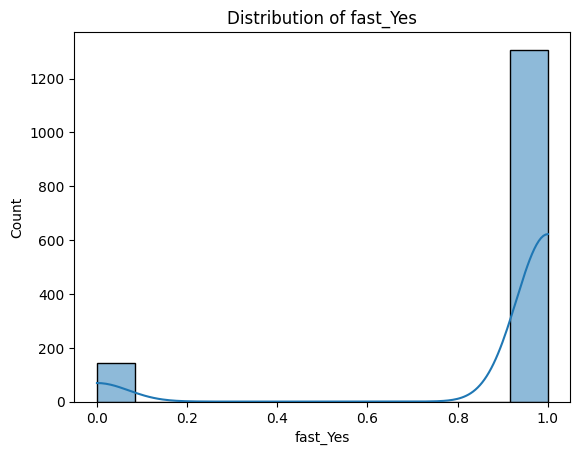

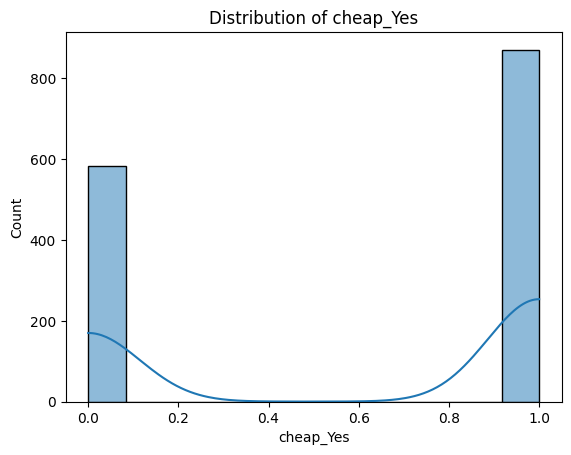

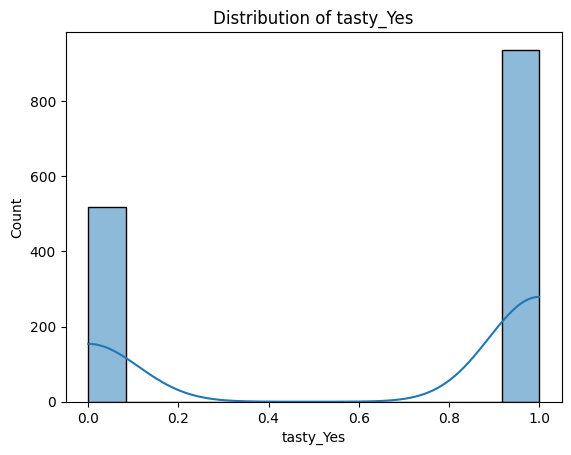

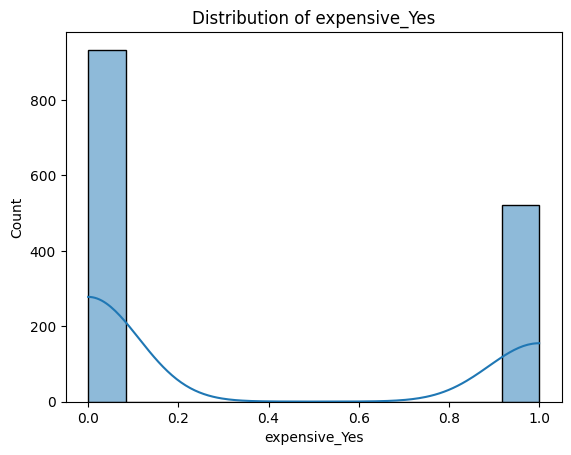

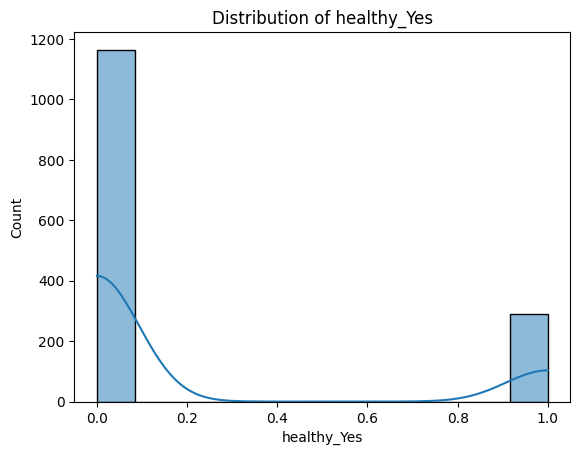

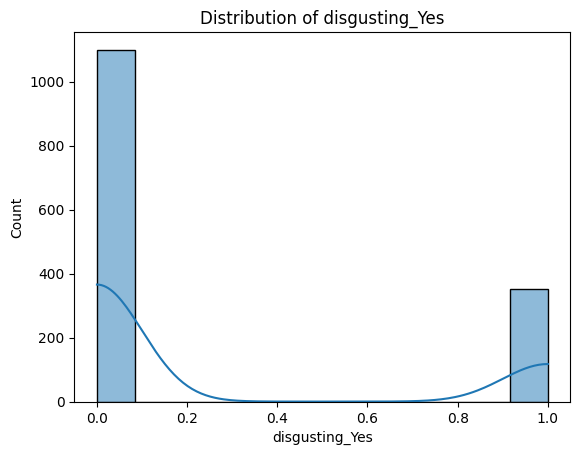

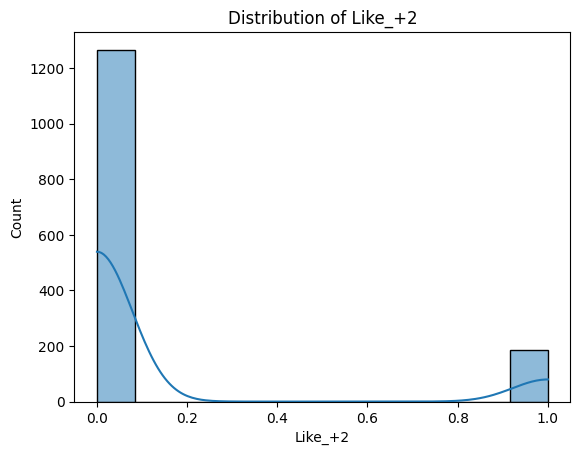

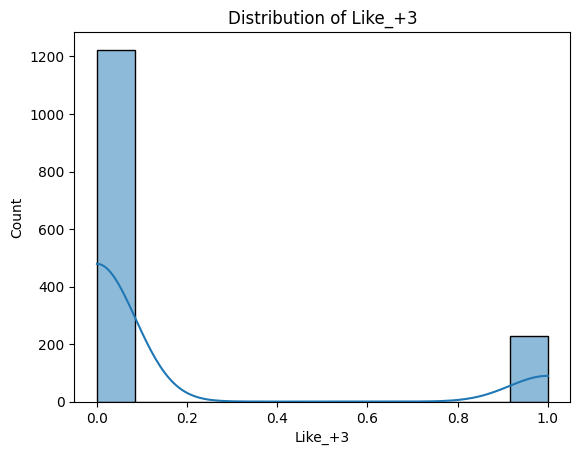

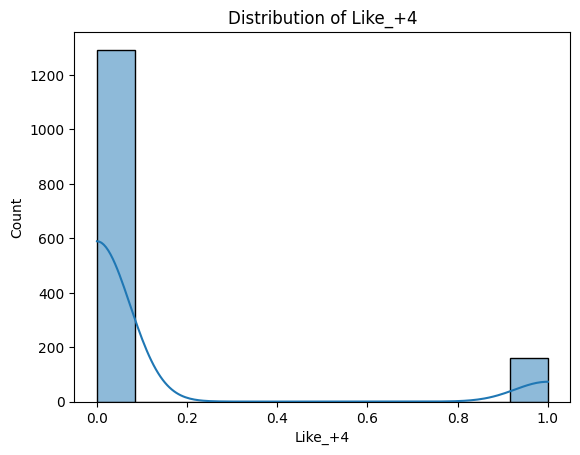

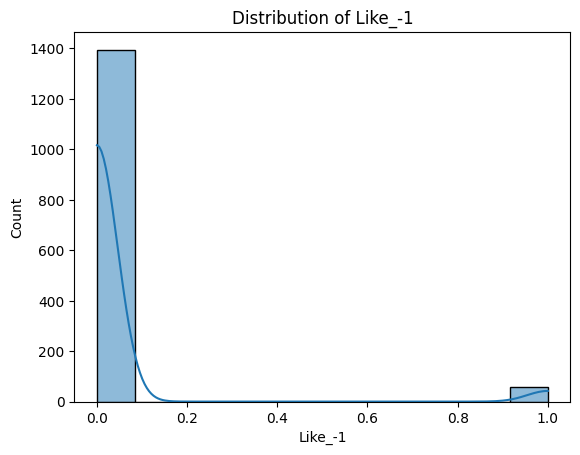

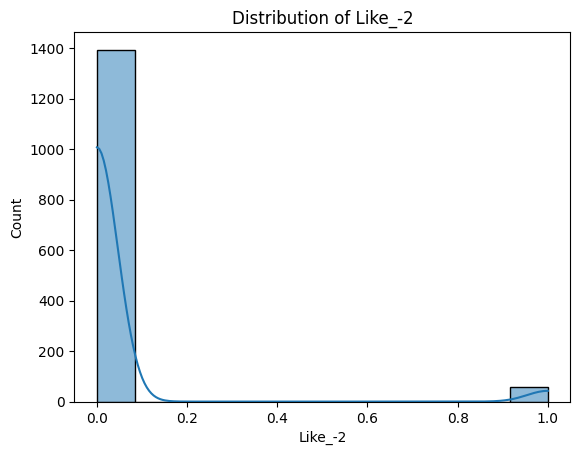

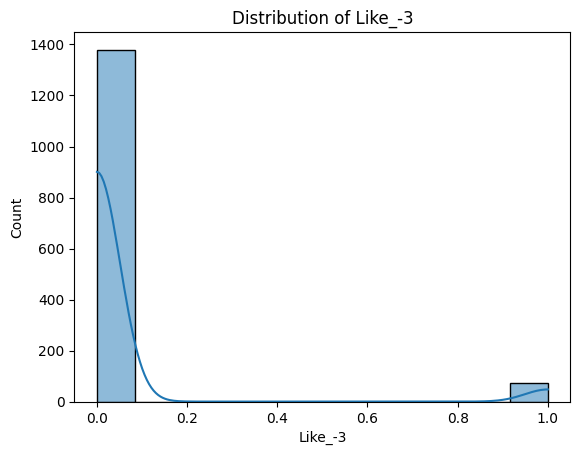

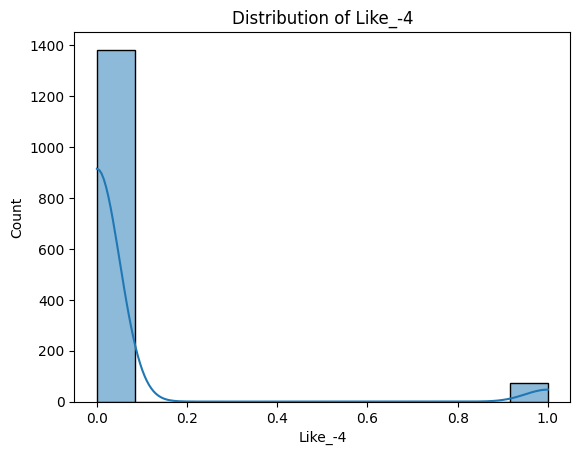

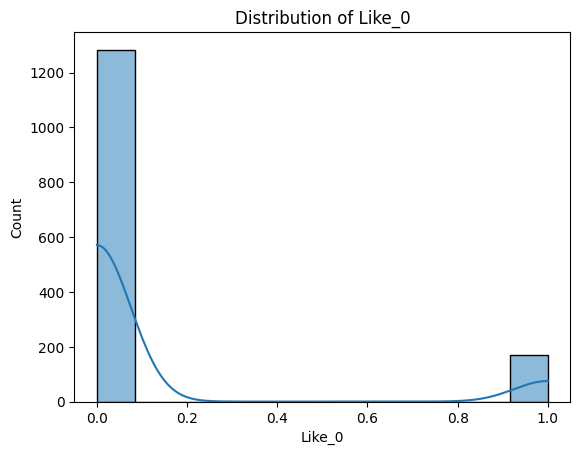

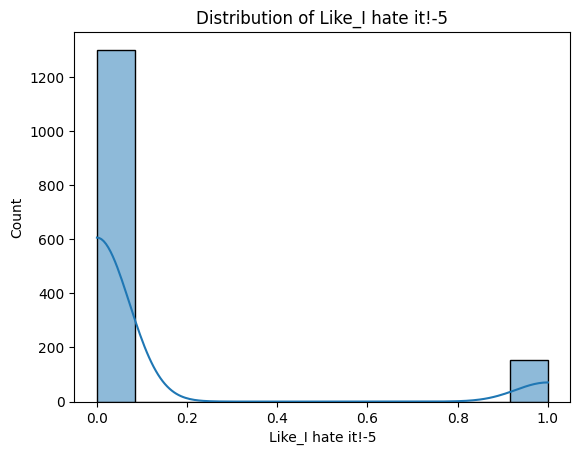

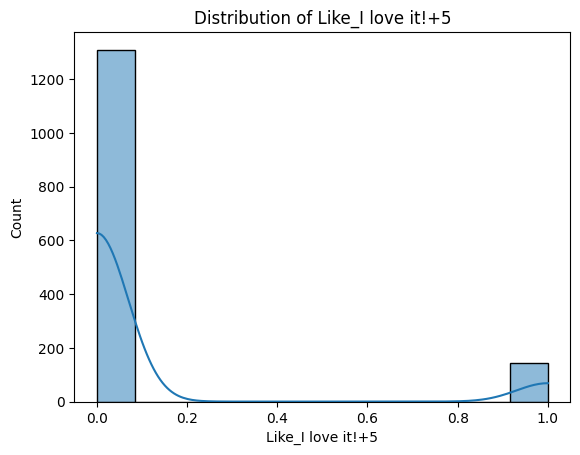

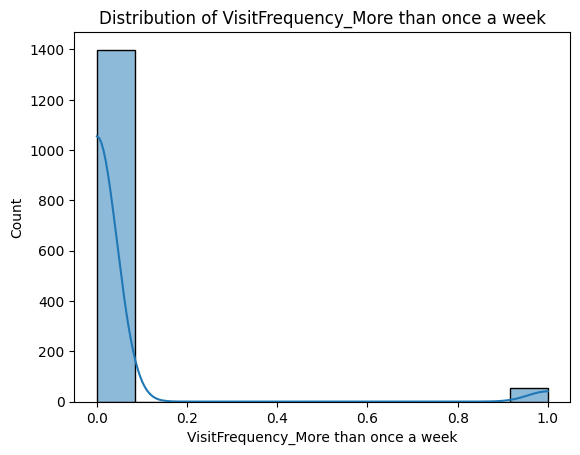

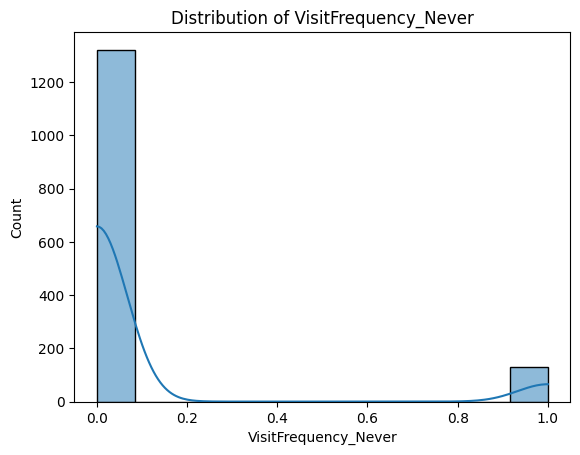

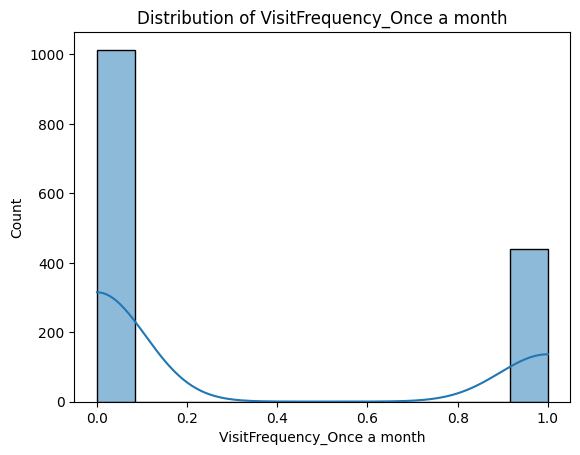

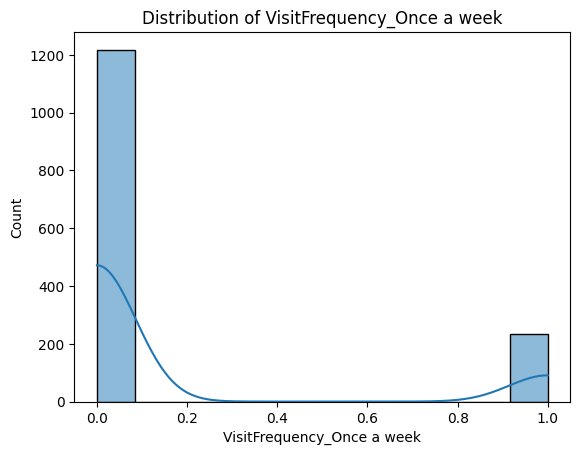

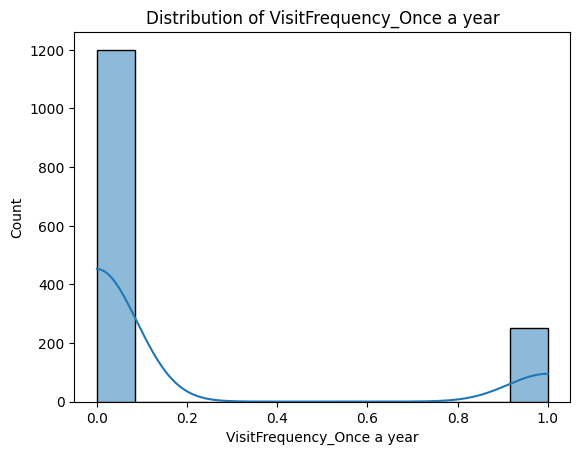

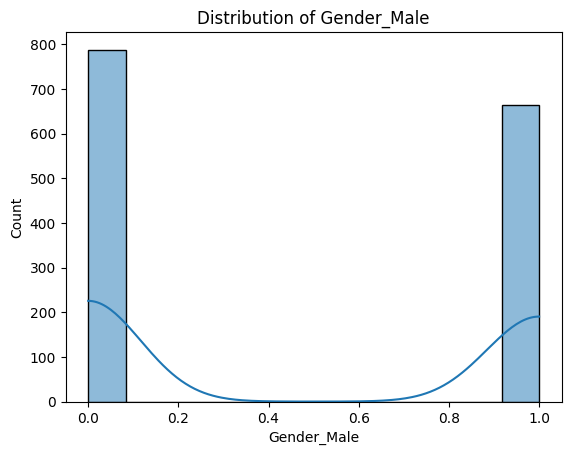

In [6]:
# Step 4: Exploring Data
import matplotlib.pyplot as plt
import seaborn as sns

# Explore feature distributions
for col in data.columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Step 5: Determining Optimal Number of Clusters using Elbow Method

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

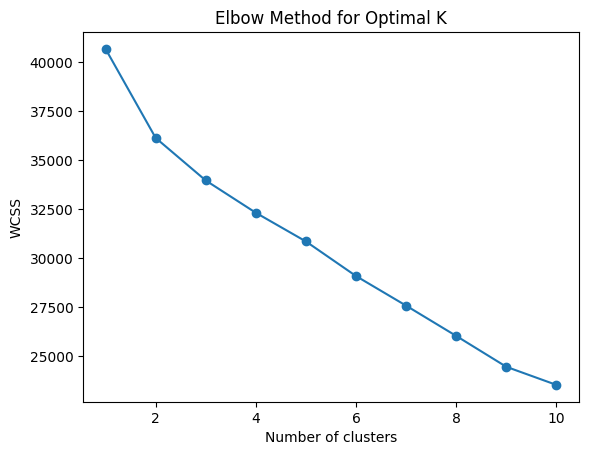

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:

from sklearn.cluster import KMeans

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method results
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Select an optimal number of clusters (e.g., k=4 based on the elbow plot)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Segment'] = clusters  # Add cluster results to the original data


# Step 6: Profile Each Segment

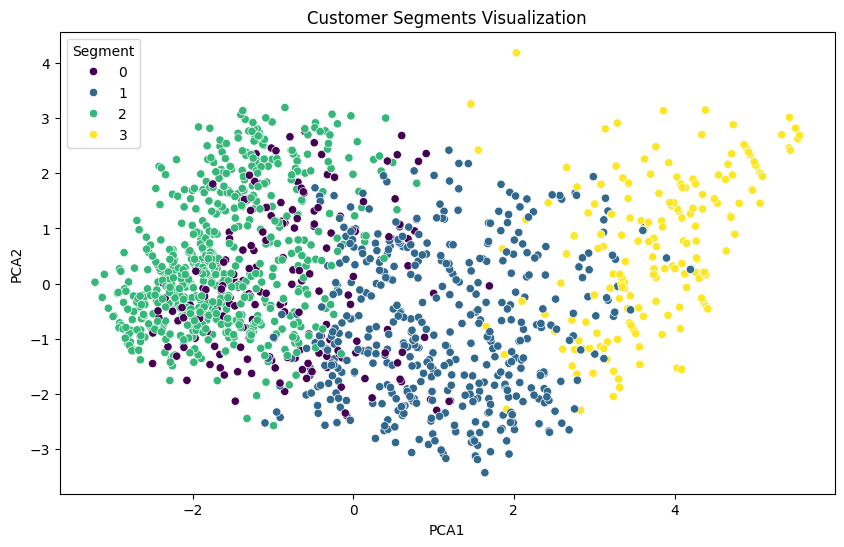

In [8]:

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Plot clusters to visualize segment distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=data, palette='viridis')
plt.title('Customer Segments Visualization')
plt.show()


# Step 7: Visualizing the Segments

In [9]:
# Step 7: Visualizing the Segments
# Profile each segment by averaging feature values for each segment
segment_profiles = data.groupby('Segment').mean()
print("Segment profiles:\n", segment_profiles)

# Describe each segment in terms of unique characteristics
for segment, profile in segment_profiles.iterrows():
    print(f"Segment {segment} profile:\n", profile)


Segment profiles:
                Age  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  \
Segment                                                                   
0        43.526882   0.709677        0.978495   0.075269       0.881720   
1        48.359477   0.178649        0.956427   0.113290       0.919390   
2        40.672496   0.930048        0.974563   0.089030       0.806041   
3        49.916201   0.022346        0.474860   0.078212       0.932961   

         greasy_Yes  fast_Yes  cheap_Yes  tasty_Yes  expensive_Yes  ...  \
Segment                                                             ...   
0          0.500000  0.924731   0.639785   0.795699       0.317204  ...   
1          0.620915  0.910675   0.551198   0.383442       0.376906  ...   
2          0.394277  0.936407   0.675676   0.950715       0.297297  ...   
3          0.776536  0.720670   0.407821   0.078212       0.564246  ...   

         Like_I hate it!-5  Like_I love it!+5  \
Segment                       

# Step 8: Selecting Target Segments

In [12]:

import pandas as pd

# Assuming segment_profiles is your DataFrame
# Replace this with your actual DataFrame if needed

# Print columns in segment_profiles to ensure the chosen sorting metric exists
print("Columns in segment_profiles:\n", segment_profiles.columns)

# Check for visit frequency columns
visit_frequency_columns = [
    'VisitFrequency_More than once a week',
    'VisitFrequency_Once a week',
    'VisitFrequency_Once a month',
    'VisitFrequency_Once a year',
    'VisitFrequency_Never'
]

# Verify that at least one visit frequency column exists
if any(col in segment_profiles.columns for col in visit_frequency_columns):
    # Sort by the most relevant visit frequency column
    # For example, we can prioritize "More than once a week" visitors first
    target_segments = segment_profiles.sort_values(by='VisitFrequency_More than once a week', ascending=False)
    print("\nTarget segments based on visit frequency:\n", target_segments)
else:
    print("\nNo visit frequency columns exist in segment_profiles. Please check your DataFrame.")

# Review profiles to decide which segments could be the focus
print("\nChoosing target segments based on profile analysis.")


Columns in segment_profiles:
 Index(['Age', 'yummy_Yes', 'convenient_Yes', 'spicy_Yes', 'fattening_Yes',
       'greasy_Yes', 'fast_Yes', 'cheap_Yes', 'tasty_Yes', 'expensive_Yes',
       'healthy_Yes', 'disgusting_Yes', 'Like_+2', 'Like_+3', 'Like_+4',
       'Like_-1', 'Like_-2', 'Like_-3', 'Like_-4', 'Like_0',
       'Like_I hate it!-5', 'Like_I love it!+5',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year', 'Gender_Male', 'PCA1', 'PCA2'],
      dtype='object')

Target segments based on visit frequency:
                Age  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  \
Segment                                                                   
2        40.672496   0.930048        0.974563   0.089030       0.806041   
1        48.359477   0.178649        0.956427   0.113290       0.919390   
0        43.526882   0.709677        0.978495   0.075269      